In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [7]:
import ehtim as eh
from   ehtim.calibrating import self_cal as sc

# Import MNIST

https://www.tensorflow.org/tutorials/keras/classification

In [3]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

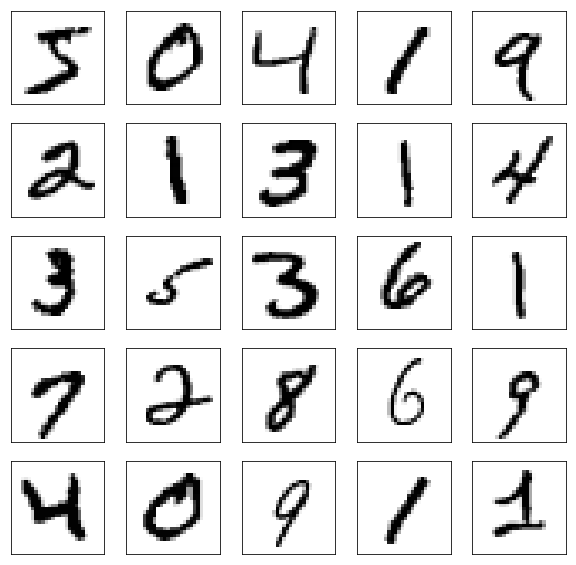

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

# Create ehtim Image

In [9]:
im = eh.image.load_txt('eht-imaging/models/avery_sgra_eofn.txt')
eht = eh.array.load_txt('eht-imaging/arrays/EHT2017.txt')

Loading text image:  eht-imaging/models/avery_sgra_eofn.txt


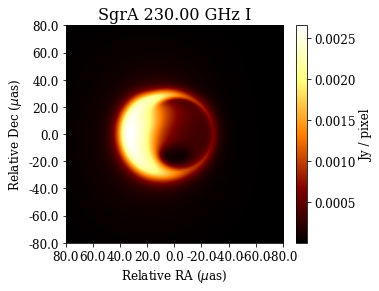

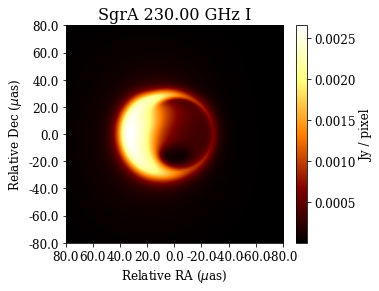

In [12]:
im.display()

In [12]:
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9

# Confs as discussed in 10/23 meeting
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='direct', sgrscat=False, ampcal=True, phasecal=True, 
                 add_th_noise=False)

Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


In [15]:
print(im.xdim, im.ydim)

100 100


In [16]:
im.imvec.shape[0]

10000

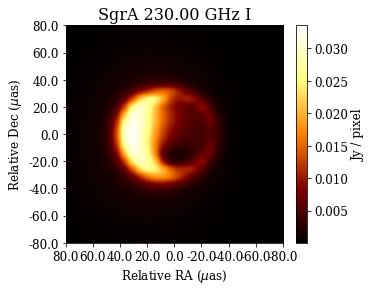

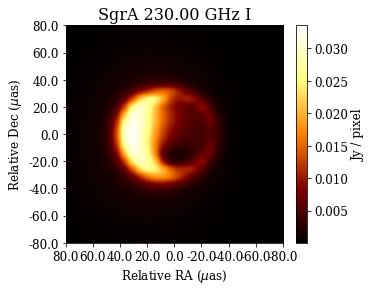

In [17]:
resampled_im = im.resample_square(28)
resampled_im.display()

In [18]:
print(resampled_im.xdim, resampled_im.ydim)

28 28


In [19]:
resampled_im.imvec.shape[0]

784

# Modify ehtim Images

In [20]:
test_image = train_images[0]
test_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
# Replace 0s with small value - was getting some weird results because of 0s ??
test_image2 = test_image.copy()
test_image2[test_image2 == 0] = 1

In [95]:
test_image2

array([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,  13,  73,   1,   1,   1,   4,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   3,
          1,  36, 136, 127,  62,  54,   1,   1,   1,   1,   3,   4,   1,
          1,   3],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   6,
          1, 102, 204, 176, 134, 144, 123,  23,   1,   1,   1,   1,  12,
         10,   1],
       [  

In [23]:
# Normalize Fashion MNIST images
total = np.sum(test_image2)
total

28143

In [24]:
test_image2 = test_image2 / total
test_image2

array([[3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05],
       [3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328146e-05,
        3.55328146e-05, 3.55328146e-05, 3.55328146e-05, 3.55328

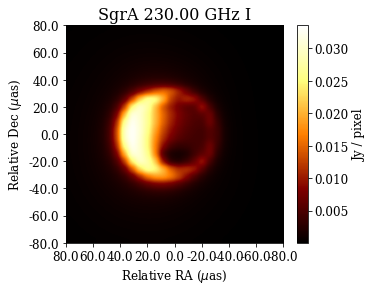

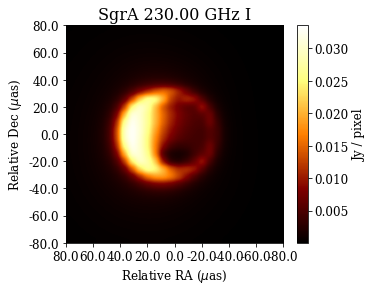

In [98]:
new_im = resampled_im.copy()
new_im.display()

In [99]:
new_im.imvec = test_image2.flatten()

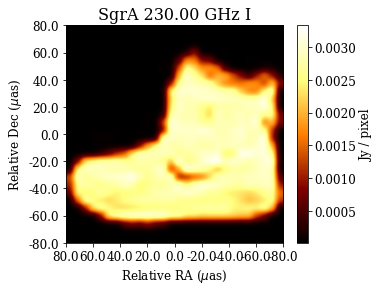

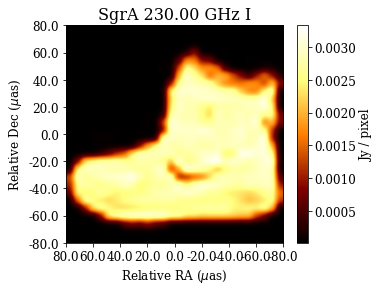

In [100]:
new_im.display()

In [101]:
obs = new_im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='direct', sgrscat=False, ampcal=True, phasecal=True, 
                 add_th_noise=False)

Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


In [103]:
obs.data['vis']

array([0.99999999+8.12556105e-06j, 0.01391349+9.81668469e-03j,
       0.01391447-9.81690570e-03j, ..., 0.99999999+6.59228492e-06j,
       0.0146216 +1.02304547e-02j, 0.01462251-1.02305825e-02j])

# Generate Dataset

In [26]:
# Constants
eht = eh.array.load_txt('./eht-imaging/arrays/EHT2017.txt')

tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9

In [11]:
# The inputs are the visibilities, outputs are the images
train_inputs, train_outputs = [], []

# train_images in this loop refers to training images for fashion MNIST 
# dataset
for i in range(len(train_images[:10]):
    # Current fashion MNIST image
    input_image = train_images[i]
    
    # Base ehtim image
    im = eh.image.load_txt('eht-imaging/models/avery_sgra_eofn.txt')
    
    # Resize to 28 x 28
    resized_im = im.resample_square(28)
    
    # Remove 0s in fashion MNIST image
    input_image_copy = input_image.copy()
    input_image_copy[input_image_copy == 0] = 1
    
    # Normalize fashion MNIST image
    total = np.sum(input_image_copy)
    input_image_copy = input_image_copy / total
    
    # Copy image over to ehtim image object
    resized_im.imvec = input_image_copy.flatten()
    
    # Generate observations
    obs = resized_im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='direct', sgrscat=False, ampcal=True, phasecal=True, 
                 add_th_noise=False)
    
    # Write image and obs out to file and store
    train_inputs.append(obs.data['vis'])
    train_outputs.append(resized_im.imvec)
    
    resized_im.save_fits("outputs/img{0}.fits".format(i))
    obs.save_uvfits("inputs/obs{0}.fits".format(i))

Loading text image:  eht-imaging/models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Building NX table
Loading text image:  eht-imaging/models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Building NX table
Loading text image:  eht-imaging/models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Building NX table
Loading text image:  eht-imaging/models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibrati

KeyboardInterrupt: 

Loading fits image:  outputs/img0.fits


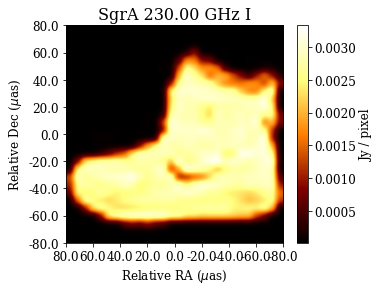

Loading fits image:  outputs/img1.fits


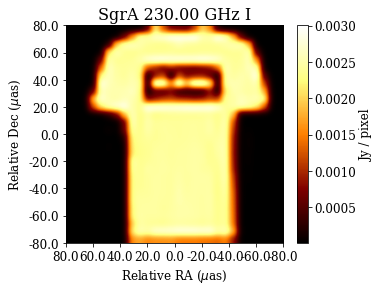

Loading fits image:  outputs/img2.fits


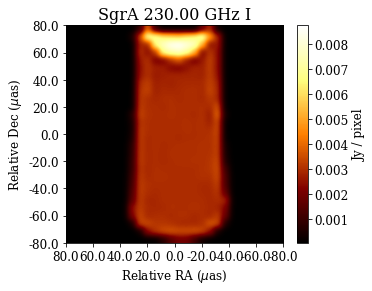

Loading fits image:  outputs/img3.fits


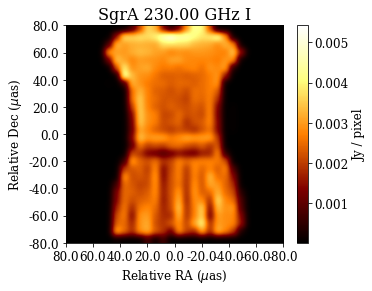

Loading fits image:  outputs/img4.fits


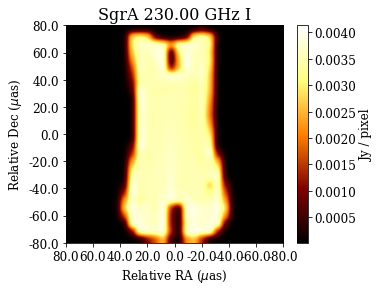

Loading fits image:  outputs/img5.fits


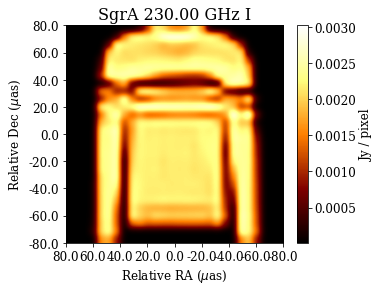

Loading fits image:  outputs/img6.fits


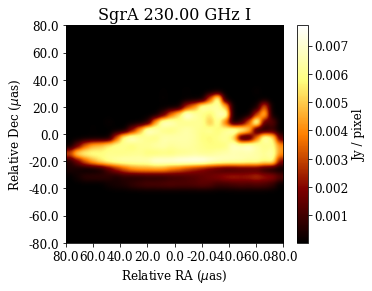

Loading fits image:  outputs/img7.fits


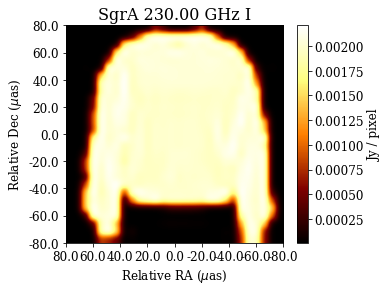

Loading fits image:  outputs/img8.fits


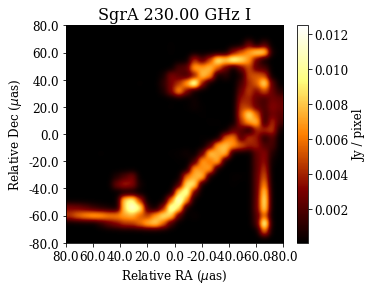

Loading fits image:  outputs/img9.fits


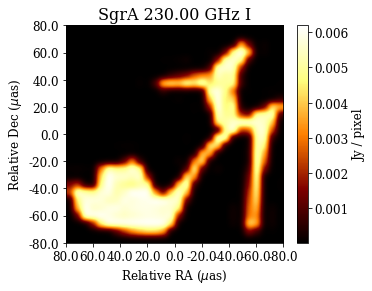

In [106]:
# Read in files and check
for i in range(10):
    im = eh.image.load_fits("outputs/img{0}.fits".format(i))
    im.display()

In [109]:
# Read in files and check
for i in range(10):
    obs_uv = eh.obsdata.load_uvfits("inputs/obs{0}.fits".format(i))
    print(obs_uv.data['vis'])

Loading uvfits:  inputs/obs0.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
[1.        +8.12556118e-06j 0.01391349+9.81668476e-03j
 0.01391447-9.81690548e-03j ... 1.        +6.59228499e-06j
 0.0146216 +1.02304546e-02j 0.01462251-1.02305822e-02j]
Loading uvfits:  inputs/obs1.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
[1.        -1.61704338e-05j 0.00884477-1.36415455e-02j
 0.00884563+1.36418305e-02j ... 1.        -1.64029188e-05j
 0.00918097-1.37682324e-02j 0.00918161+1.37683917e-02j]
Loading uvfits:  inputs/obs2.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
[1.        -1.50906581e-05j 0.01608103+1.11040566e-02j
 0.01608073-1.11099565e-02j ... 1.        -1.51986569e-05j
 0.01552473+1.50807500e-02j 0.01552378-1.50864543e-02j]
Loading uvfits:  inputs/obs3.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
[1.        -1.

In [111]:
for obs in train_inputs:
    print(obs)

[0.99999999+8.12556105e-06j 0.01391349+9.81668469e-03j
 0.01391447-9.81690570e-03j ... 0.99999999+6.59228492e-06j
 0.0146216 +1.02304547e-02j 0.01462251-1.02305825e-02j]
[0.99999999-1.61704346e-05j 0.00884477-1.36415458e-02j
 0.00884563+1.36418309e-02j ... 0.99999999-1.64029192e-05j
 0.00918097-1.37682322e-02j 0.00918161+1.37683915e-02j]
[0.99999999-1.50906579e-05j 0.01608103+1.11040565e-02j
 0.01608073-1.11099567e-02j ... 0.99999999-1.51986565e-05j
 0.01552473+1.50807500e-02j 0.01552378-1.50864545e-02j]
[0.99999999-1.18001534e-05j 0.01056163+5.28049883e-03j
 0.01056119-5.28256475e-03j ... 0.99999999-1.16873502e-05j
 0.0100027 +6.54996845e-03j 0.01000221-6.55163864e-03j]
[ 0.99999999+1.34442178e-05j -0.00565782+5.16355471e-03j
 -0.00565577-5.16538037e-03j ...  0.99999999+1.33612136e-05j
 -0.00453775+6.23225685e-03j -0.00453599-6.23406309e-03j]
[ 0.99999999-4.91697798e-06j -0.01744671-7.93822615e-03j
 -0.01744628+7.93775750e-03j ...  0.99999999-4.98300707e-06j
 -0.01700826-7.86867989e-0

# Run to generate full dataset:

In [8]:
# Constants
eht = eh.array.load_txt('eht-imaging/arrays/EHT2017.txt')

tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9

In [9]:
# The inputs are the visibilities, outputs are the images
train_inputs, train_outputs = [], []

# Base ehtim image
im = eh.image.load_txt('eht-imaging/models/avery_sgra_eofn.txt')

# Resize to 28 x 28
resized_im = im.resample_square(28)

# train_images in this loop refers to training images for MNIST 
# dataset
# len(train_images)
for i in range(159, 160):
    if i % 100 == 0:
        print("\nGenerating data for image {0}".format(i))
        
    # Current MNIST image
    input_image = train_images[i]
    
    # Remove 0s in MNIST image
    input_image_copy = input_image.copy()
    input_image_copy[input_image_copy == 0] = 1
    
    # Normalize MNIST image
    total = np.sum(input_image_copy)
    input_image_copy = input_image_copy / total
    
    # Copy image over to ehtim image object
    resized_im.imvec = input_image_copy.flatten()
    
    # Generate observations
    obs = resized_im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='direct', sgrscat=False, ampcal=True, phasecal=True, 
                 add_th_noise=False)
    
    # Write image and obs out to file and store
    train_inputs.append(obs.data['vis'])
    train_outputs.append(resized_im.imvec)
    
    resized_im.save_fits("outputs/mnist_img{0}.fits".format(i))
    obs.save_uvfits("inputs/mnist_obs{0}.fits".format(i))

Loading text image:  eht-imaging/models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Building NX table
